## This dataset contains house sale prices for King County including homes sold between           
## May 2014 and May 2015. 

## The goal is to predict the sales price for each house based on the given features.  

### Importing the necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
print("Libraries Imported")

Libraries Imported


In [2]:
#Function to plot histogram of price
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()

In [3]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error:"+ str(mse))
    rmse = np.sqrt(mean_squared_error(df1,(df2)))
    print("Root mean squared logarithmic error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df2,y=df1) 

## Data Cleaning

In [4]:
train_data = pd.read_csv(r'C:\Users\hp\Desktop\Datasets\house_data.csv')
print("Dataset imported")

Dataset imported


In [5]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
train_data.shape

(21613, 21)

In [7]:
train_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
train_data.duplicated().sum()

0

In [9]:
IDCount = train_data.groupby('id')['yr_built','zipcode'].count()
IDCount[0:10]

,yr_built,zipcode
id,,
1000102,2,2
1200019,1,1
1200021,1,1
2800031,1,1
3600057,1,1
3600072,1,1
3800008,1,1
5200087,1,1
6200017,1,1


In [10]:
train_data.loc[train_data['id'] == 1000102]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2496,1000102,20140916T000000,280000.0,6,3.0,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2497,1000102,20150422T000000,300000.0,6,3.0,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316


In [11]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Now the dataset is pretty clean
In next step we will look into datatypes of columns

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data analysis and Data visualization

In [13]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


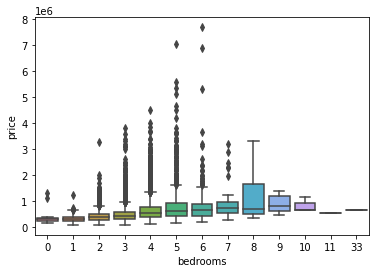

In [14]:
sns.boxplot(x= train_data['bedrooms'], y=train_data['price'])

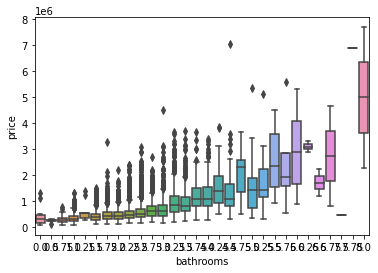

In [15]:
sns.boxplot(x= train_data['bathrooms'], y=train_data['price'])

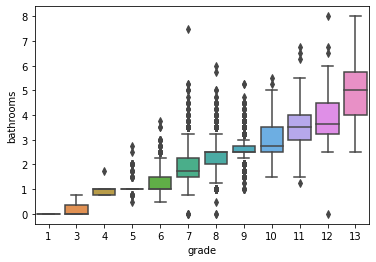

In [16]:
sns.boxplot(x= train_data['grade'], y=train_data['bathrooms'])

## From above statistics we can analyse the dataset
1.  Average price of house sold in King County is $538926.

2.  The maximum price of the house is $7700000
3.  There will always be some outliers as some luxury house prices in this dataset I did normalisation in next step to reduce       the effect of outliers
4.  The sqft_living column has maximum value of 12050 sqft, which is 3 standard deviations above mean. This can be the             case if house is luxury but  to reduce the effect I did normalisation of this column as well
5.  Avg no. of 3 bedrooms and 2 bathrooms per house were sold in King County 
6.  Avg area of house is 2071 Sqft with one house having 12050 Sqft. area
7. The dataset contains houses built from year 1900 to 2015

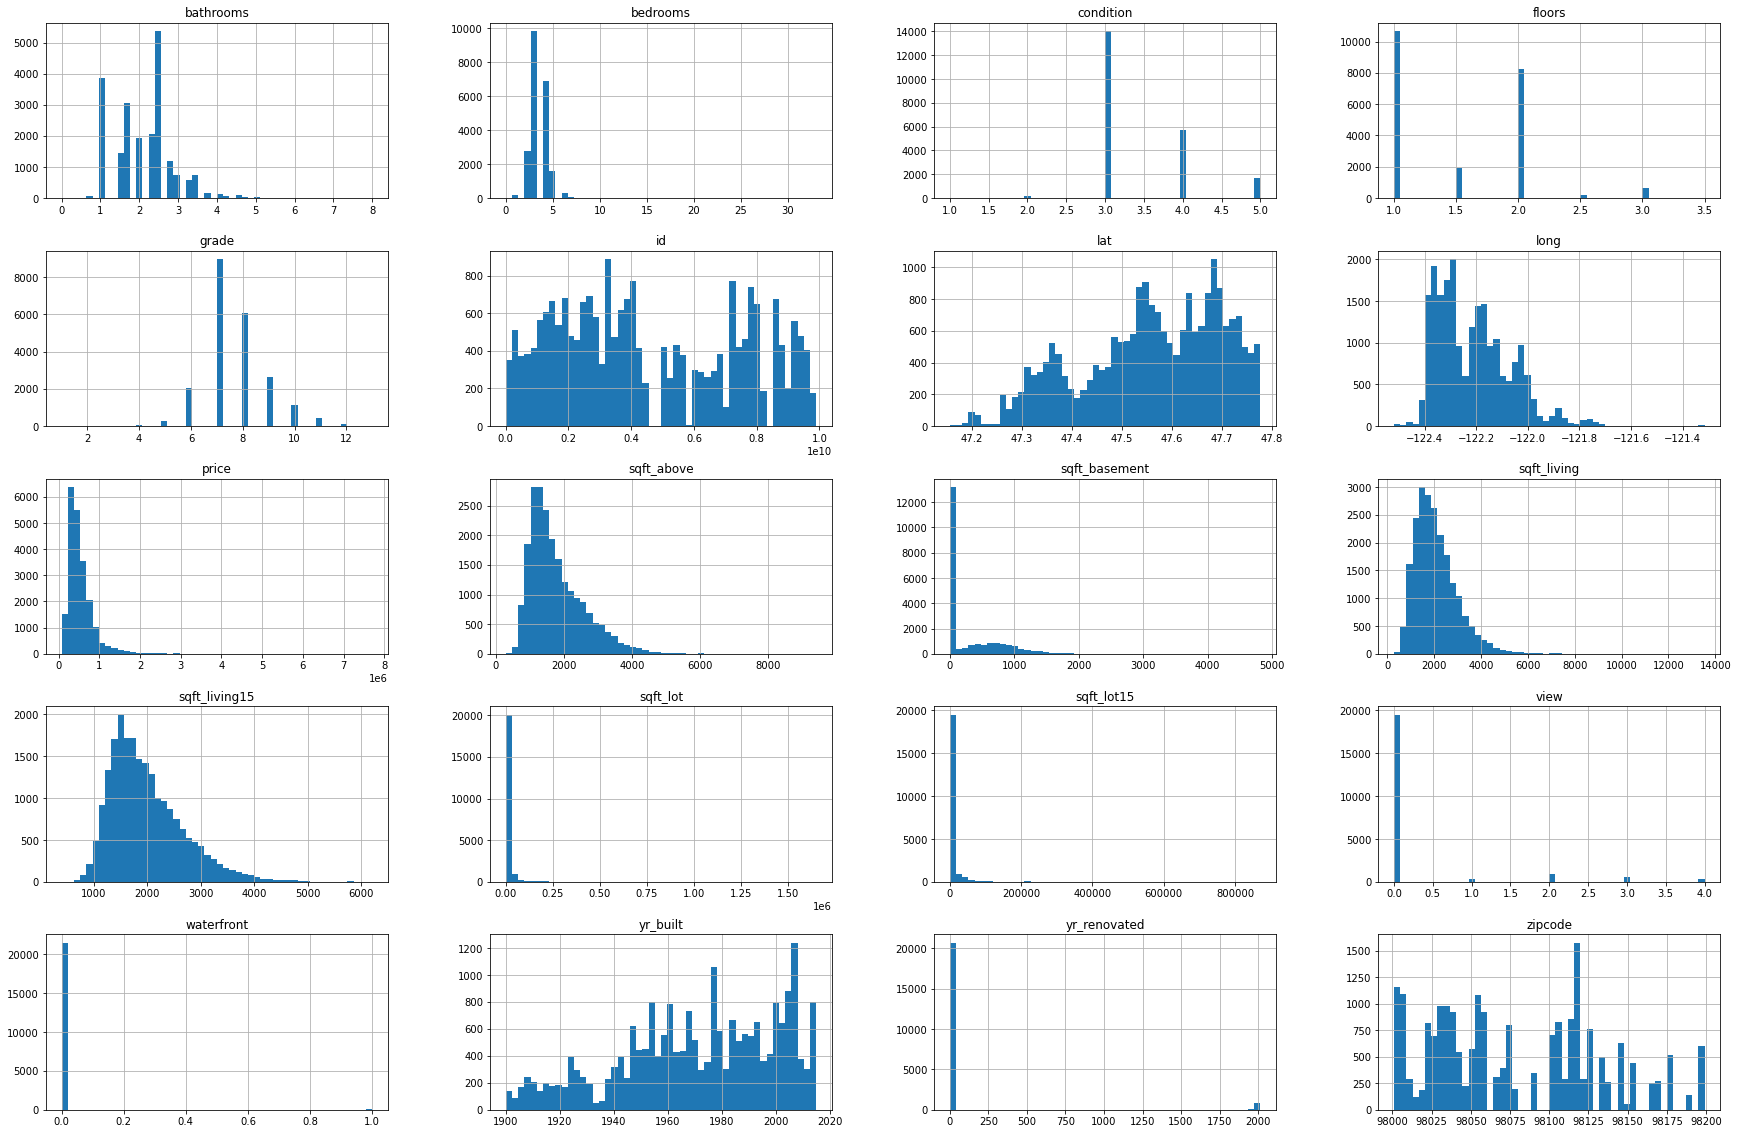

In [17]:
# Plot the histograms of each 
train_data.hist(bins=50, figsize=(30,20))
plt.show()

## Conclusions from above histrograms
1] Most of the houses in the dataset have 3 bedrooms
2] Most of the houses have condition 3 and have only 1 floor
3] Most of the houses have grade=7
4] The histograms of Price and sqft_living are right-skewed.

## Data preprocessing
The price and sqft_living has appreciable positive skewness, deviates from the normal distribution. Log transormation to make the scale numeric

Text(0.5, 0, 'price')

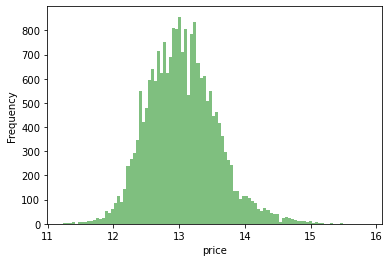

In [18]:
train_data.price = np.log(train_data.price)
DrawHistogram(train_data.price)
plt.xlabel('price')

In [19]:
train_data.price.describe()

count    21613.000000
mean        13.047817
std          0.526685
min         11.225243
25%         12.682152
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

## Computing new columns

#### Calculating the age of house by taking the difference between year_sold and year_built

In [20]:
train_data['year_sold'] = train_data['date'].apply(lambda x: int(x[:4]))

In [21]:
train_data['house_age'] = train_data[['year_sold']].sub(train_data['yr_built'], axis=0)

#### The yr_renovated has no significance because we can not tell wheter it is renovated or not so we will create a column which will have value 0 for no renovation and 1 for renovated house.

In [22]:
train_data['is_renovated'] = train_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

### Remove the columns date,yr_built as we have used them to calculate new column

In [23]:
train_data.drop(["yr_built", "yr_renovated","date","year_sold"], axis = 1, inplace = True) 

## Feature Selection
 Unnecessary features decrease training speed, decrease model interpretability, and, most importantly, decrease generalization performance on the test set.

In [24]:
train_data.shape

(21613, 20)

###### Now there are 20 columns in our dataset so we have to select those important features only which have high impact on price. Correlation refers to some statistical relationships involving dependence between variables.
A heatmap shows the relative intensity of a value within an array. This means that we have a large amount of numbers, and each is given a graphical representation. Those that are highest in their value – relative to the other present numbers – will be given a “hot” color, while those that are lower in their value

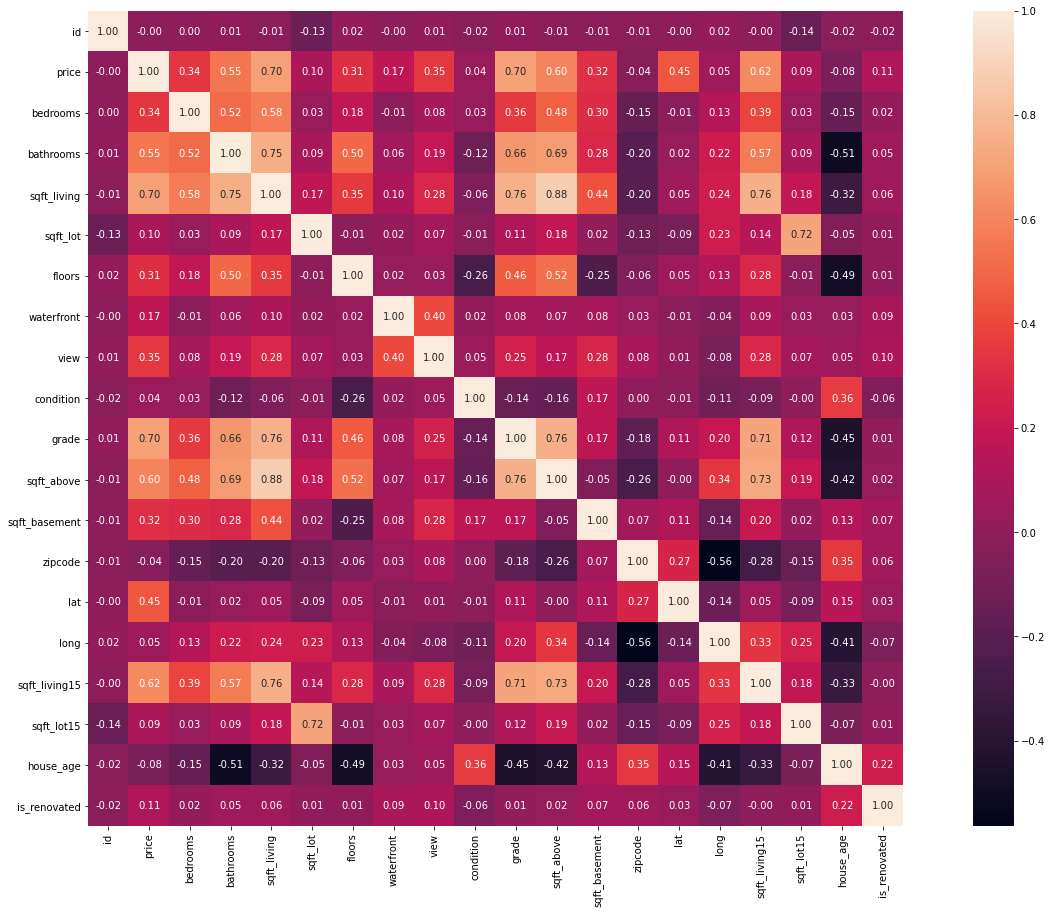

In [25]:
#price correlation matrix
corrmat =train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

### Converting zipcodes into categories

In [26]:
train_data = pd.get_dummies(train_data,columns=['zipcode'])

### printing correlation values of each coefficient with respect to price

In [27]:
corr_matrix = train_data.corr()
cor_target=abs(corr_matrix["price"]).sort_values(ascending=False)
cor_target

price            1.000000
grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
                   ...   
zipcode_98024    0.007368
zipcode_98059    0.006585
zipcode_98011    0.004791
id               0.003819
zipcode_98070    0.003538
Name: price, Length: 89, dtype: float64

### As we can see the correlation value for grade, sqft_living,sqft_living15, sqft_above ,bathrooms, lat ,view,          bedrooms, floors are above 0.3 and other features have much less coefficients. So now we will try to visualize whether the correlation values above reflects the same.

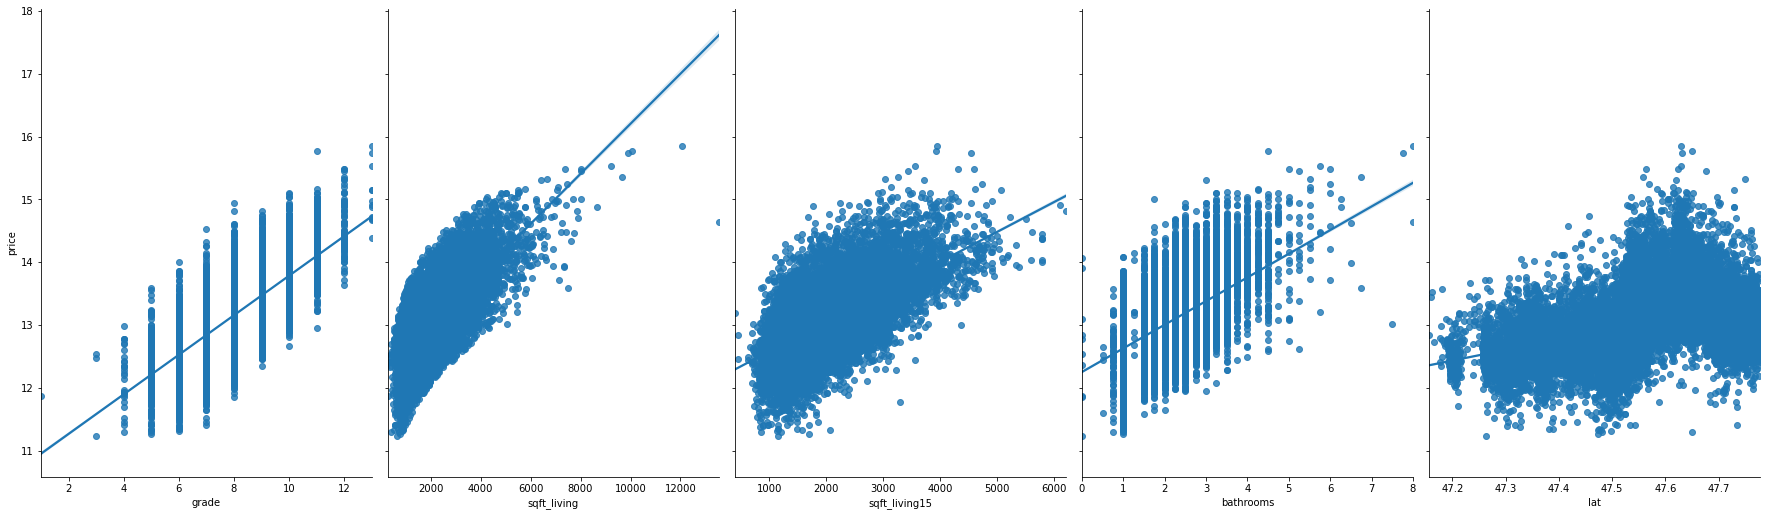

In [28]:
sns.pairplot(train_data, x_vars=['grade','sqft_living','sqft_living15','bathrooms','lat'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear that with sqft_living, grade, bathrooms,lat features price of houses increases significantly

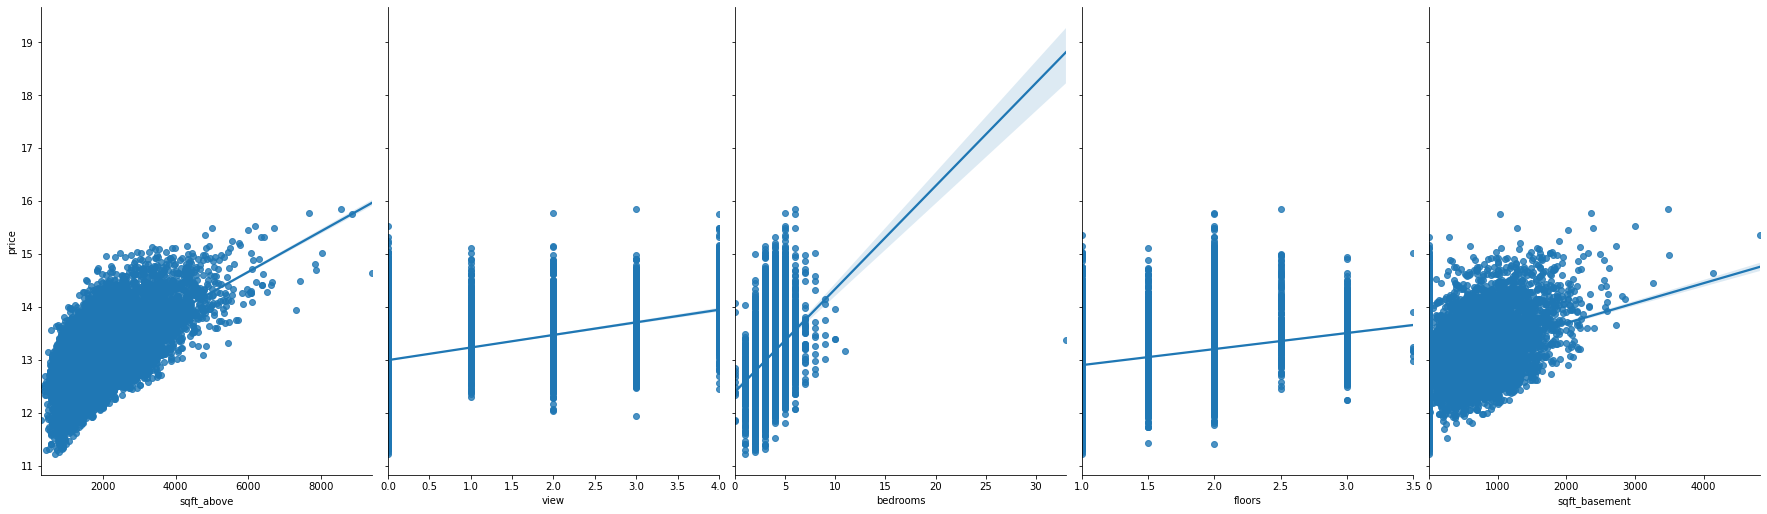

In [29]:
sns.pairplot(train_data, x_vars=['sqft_above','view','bedrooms','floors','sqft_basement'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear with sqft_above, view, bedrooms,floors,sqft_basement features price of houses shows slight increase but not as significant as above features

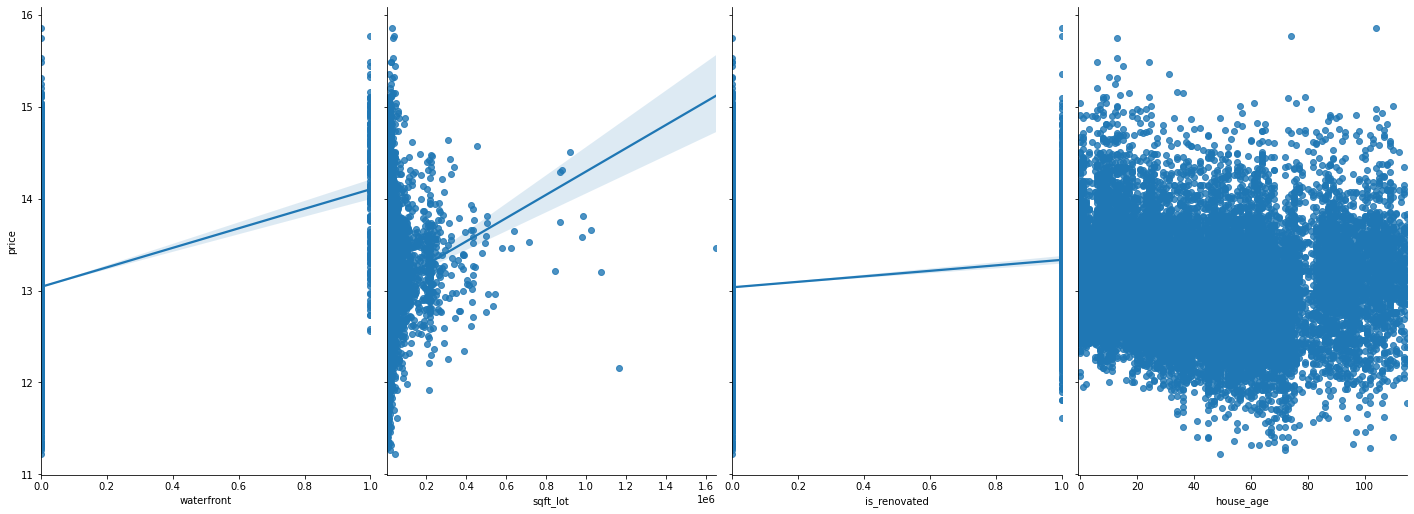

In [30]:
sns.pairplot(train_data, x_vars=['waterfront','sqft_lot','is_renovated','house_age'], y_vars='price', size=7, aspect=0.7, kind='reg')

### Surprisingly, age of house or whether it is renovated or not does not affect the price of house much. 
#### Now we will keep only those features whose value is greater than 0.5. 
#### One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.
#### So, we will exclude sqft_living15 because it is highly correlated with sqft_living(0.76). 

In [31]:
#Selecting highly correlated features
relevant_features1 = cor_target[cor_target>0.5]
relevant_features1

price            1.000000
grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
bathrooms        0.550802
Name: price, dtype: float64

In [32]:
main_features1 = ['grade','sqft_living','sqft_above','bathrooms']
X1 = train_data[main_features1]
y1 = train_data.price

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

## Model Implementation

### 1] Simple linear regression

In [34]:
#Initialize Linear Regression variable
LinearRegression1 = linear_model.LinearRegression()
LinearRegression1.fit(X_train1,y_train1)

LinearRegression()

Mean squared error:0.11605607998788951
Root mean squared logarithmic error: 0.34067004562756836
R-squared value: 0.5662522910862371


'Accuracy: 57%'

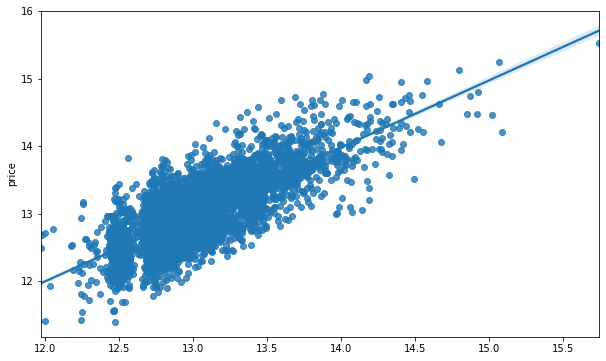

In [35]:
predictions1 = LinearRegression1.predict(X_test1)
printStatistics(y_test1,predictions1)
accuracy = LinearRegression1.score(X_test1, y_test1)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [36]:
scores = cross_val_score( LinearRegression1, X1, y1, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.5625474954331979


### The previous model has R squared very low it is because we have used less features to predict the price. 
### Now we will include more features to increase the R squared value by  selecting features which have 
### correlation coefficient>0.2

In [37]:
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.2]
relevant_features2

price            1.000000
grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
zipcode_98004    0.222518
Name: price, dtype: float64

In [38]:
main_features2 = ['grade','sqft_living','sqft_living15','sqft_above','bathrooms','view','lat','bedrooms',
                  'sqft_basement','waterfront','zipcode_98004','floors']
X2 = train_data[main_features2]
y2 = train_data.price

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

#### We will check the best possible features to train the model by using recursive feature elimination.
#### It uses accuracy metric to rank the feature according to their importance. 
#### The RFE method takes the model to be used and the number of required features as input.

### Recursive feature elimination

In [40]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train2,y_train2)
    X_test_rfe = rfe.transform(X_test2)
    model.fit(X_train_rfe,y_train2)
    score = model.score(X_test_rfe,y_test2)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.748173


In [41]:
cols = list(X_train2.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  
#Fitting the data to model
model.fit(X_rfe,y2)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['grade', 'sqft_living', 'sqft_living15', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'zipcode_98004', 'floors'],
      dtype='object')


In [42]:
main_features3 = ['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'zipcode_98004', 'floors']
X3 = train_data[main_features3]
y3 = train_data.price

In [43]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)

###  2] Complex Linear Regression(with more features)

In [44]:
#Initialize Linear Regression variable
LinearRegression2 = linear_model.LinearRegression()
LinearRegression2.fit(X_train3,y_train3)


LinearRegression()

Mean squared error:0.06799602361881708
Root mean squared logarithmic error: 0.26076047173376776
R-squared value: 0.7458718279732899


'Accuracy: 75%'

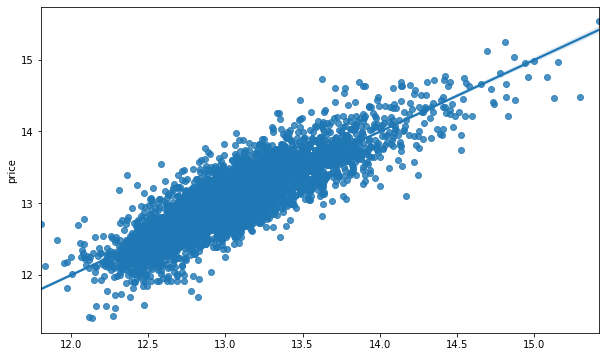

In [45]:
predictions2 = LinearRegression2.predict(X_test3)
printStatistics(y_test3,predictions2)
accuracy = LinearRegression2.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Cross Validation
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

In [46]:
scores = cross_val_score( LinearRegression2, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7427296660763082


## 3] Ridge regression

Mean squared error:0.06803781932486878
Root mean squared logarithmic error: 0.260840601373461
R-squared value: 0.7457156208039262


'Accuracy: 75%'

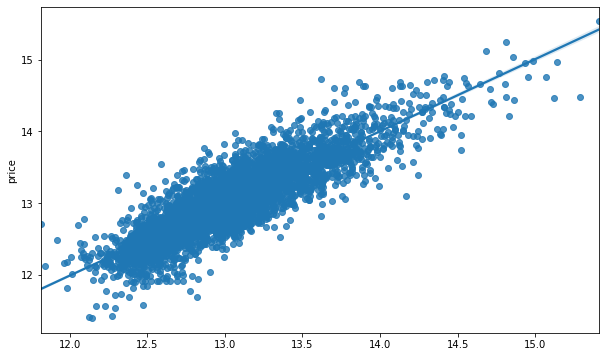

In [47]:
ridgeReg = Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(X_train3,y_train3)
predictions3 = ridgeReg.predict(X_test3)
printStatistics(y_test3,predictions3)
accuracy = ridgeReg.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [48]:
scores = cross_val_score( ridgeReg, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7426940422269428


## 4] polynomial regression

Mean squared error:0.060988418206809704
Root mean squared logarithmic error: 0.2469583329365699
R-squared value: 0.7720620352657218


'Accuracy: 77%'

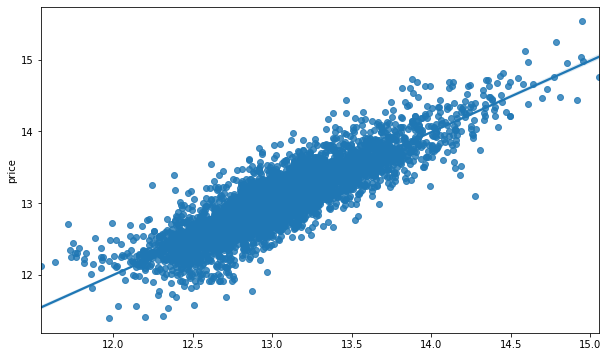

In [49]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=2)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)
QuadraticPolynomial = LinearRegression2.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)
accuracy = QuadraticPolynomial.score(X_test4, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [50]:
predictions4

array([12.96390691, 14.2081028 , 12.94330834, ..., 12.90664443,
       12.53450605, 12.99511978])

In [51]:
scores = cross_val_score(QuadraticPolynomial, X_train4, y_train3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7703013456852764


### 5]  Lasso Regression

Mean squared error:0.07759465564760452
Root mean squared logarithmic error: 0.2785581728250035
R-squared value: 0.7099979241534533


'Accuracy: 71%'

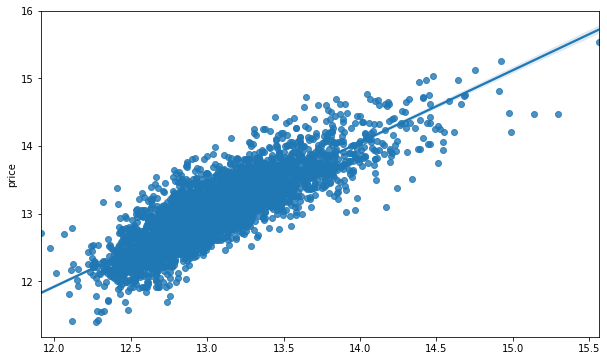

In [52]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train3,y_train3)
predictions_lasso = lassoModel.predict(X_test3)
printStatistics(y_test3,predictions_lasso)
accuracy = lassoModel.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

### Models with all features

In [53]:
X_whole_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [54]:
X_whole = train_data[X_whole_features]
y_whole = train_data.price

In [55]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_whole.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_whole[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_whole,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'z

In [56]:
X_whole_features1=['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                   'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001', 
                   'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 
                   'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 
                   'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 
                   'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040',
                   'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
                   'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 
                   'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 
                   'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 
                   'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
                   'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 
                   'zipcode_98155','zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 
                   'zipcode_98198', 'zipcode_98199']

In [57]:
X_whole = train_data[X_whole_features1]
y_whole = train_data.price

In [58]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X_whole, y_whole, test_size=0.20, random_state=0)

### 6] Rigde regression with more features

Mean squared error:0.05259811803855252
Root mean squared logarithmic error: 0.2293427959159662
R-squared value: 0.8034199225514208


'Accuracy: 80%'

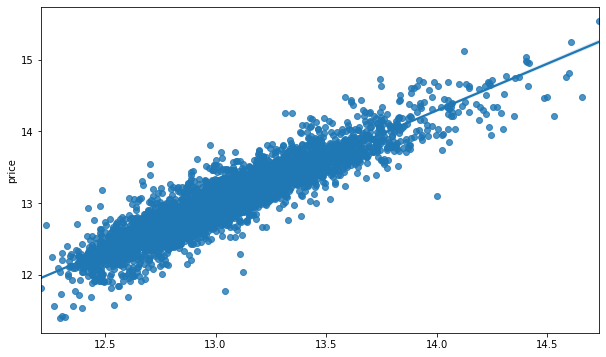

In [59]:
ridgeReg2 = Ridge(alpha=1, normalize=True)
ridgeReg2.fit(X_train_whole,y_train_whole)
predictions_whole = ridgeReg2.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole)
accuracy = ridgeReg2.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [60]:
scores = cross_val_score(ridgeReg2, X_whole, y_whole, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.8016308625122898


### 7] Lasso Model with more features
The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Mean squared error:0.06902017158681627
Root mean squared logarithmic error: 0.26271690388480196
R-squared value: 0.7420441798676957


'Accuracy: 74%'

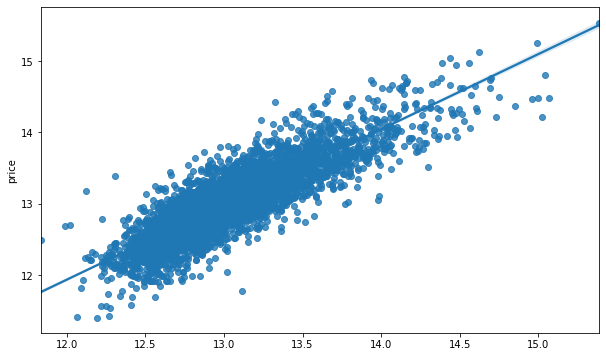

In [61]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train_whole,y_train_whole)
predictions_whole_lasso = lassoModel.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole_lasso)
accuracy = lassoModel.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))